# Problem Statement:

## Customer churn is a financial term that refers to the loss of a client or customer—that is, when a customer ceases to interact with a company or business. Similarly, the churn rate is the rate at which customers or clients are leaving a company within a specific period of time. A churn rate higher than a certain threshold can have both tangible and intangible effects on a company’s business success. Ideally, companies like to retain as many customers as they can. 

# How a bank can predict customer churn based on different customer attributes such as age, gender, geography, and more. 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from pylab import rcParams
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
customer_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
customer_data.shape

(10000, 14)

In [4]:
columns = customer_data.columns.values.tolist()
columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [5]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## RowNumber, CustomerId and Surname are excluded from feature selection.

In [6]:
dataset = customer_data.drop(['RowNumber','CustomerId','Surname'],axis=1)

## No missing data found

In [7]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

## Percentage of Churn in Dataset

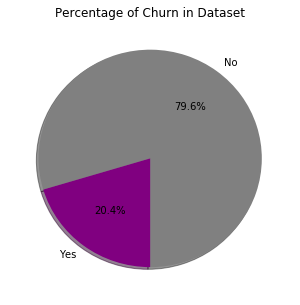

In [10]:
# Data to plot
sizes = dataset['Exited'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,   colors=colors,
        autopct='%1.1f%%', labels= ['No','Yes'],shadow=True, startangle=270)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [11]:
Counter(dataset['Gender'])

Counter({'Female': 4543, 'Male': 5457})

# Categorical Independent Variable vs Target Variable

In [12]:
Gender=pd.crosstab(dataset['Gender'],dataset['Exited']) 
Gender

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


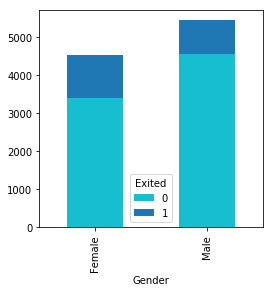

In [13]:
Gender.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [14]:
Geography=pd.crosstab(dataset['Geography'],dataset['Exited']) 
Geography

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


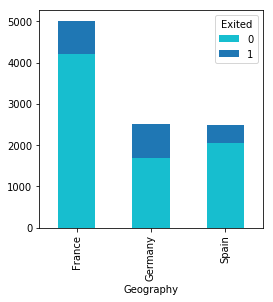

In [15]:
Geography.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [16]:
NumOfProducts=pd.crosstab(dataset['NumOfProducts'],dataset['Exited']) 
NumOfProducts

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


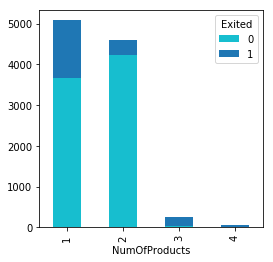

In [17]:
NumOfProducts.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [18]:
IsActiveMember=pd.crosstab(dataset['IsActiveMember'],dataset['Exited']) 
IsActiveMember

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


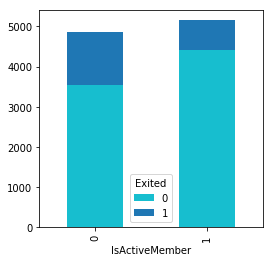

In [19]:
IsActiveMember.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [20]:
HasCrCard=pd.crosstab(dataset['HasCrCard'],dataset['Exited']) 
HasCrCard

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


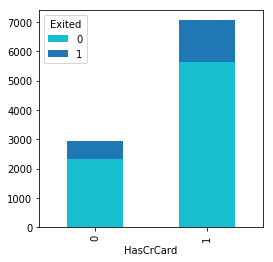

In [21]:
HasCrCard.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [22]:
bins=[0,80000,160000,250898] 
group=['Low','Average','High'] 
Income_bin=pd.crosstab(pd.cut(dataset['Balance'],bins,labels=group),dataset['Exited']) 
Income_bin

Exited,0,1
Balance,,
Low,456,129
Average,3946,1269
High,444,138


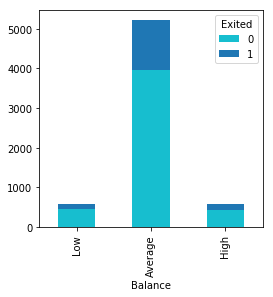

In [23]:
Income_bin.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [24]:
bins=[18,42,67,92] 
group=['18-42','43-67','68-92'] 
Age=pd.crosstab(pd.cut(dataset['Age'],bins,labels=group),dataset['Exited']) 
Age

Exited,0,1
Age,,
18-42,6254,830
43-67,1520,1182
68-92,169,23


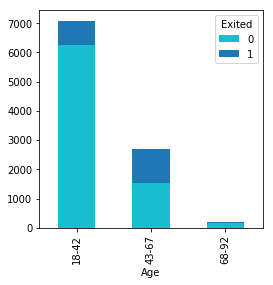

In [25]:
Age.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [26]:
bins=[0,3,5,7,10] 
group=['0-2','3-4','5-6','7-9'] 
Tenure=pd.crosstab(pd.cut(dataset['Tenure'],bins,labels=group),dataset['Exited']) 
Tenure

Exited,0,1
Tenure,,
0-2,2446,646
3-4,1589,412
5-6,1622,373
7-9,1988,511


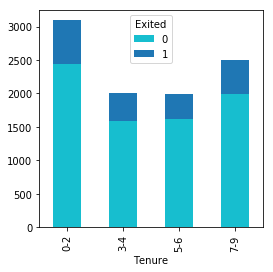

In [27]:
Tenure.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

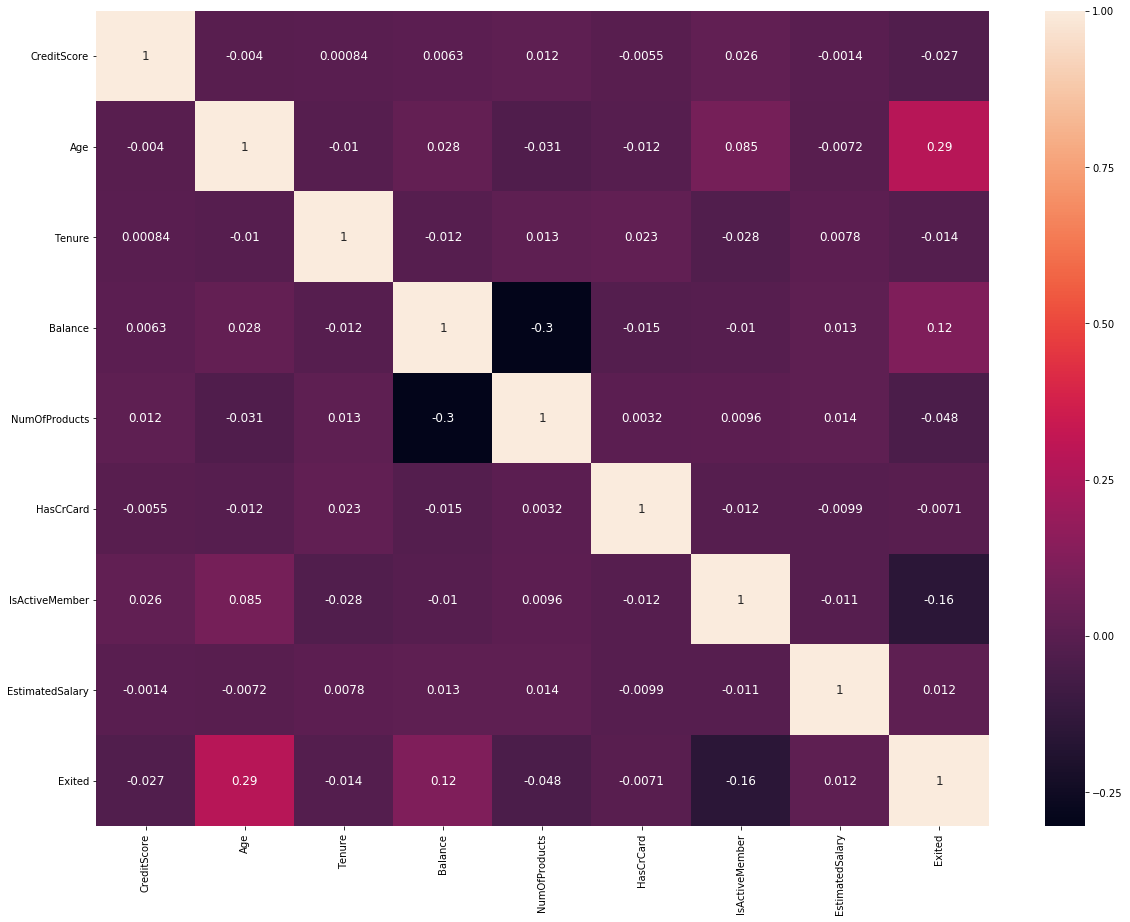

In [28]:
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [29]:
Geography = pd.get_dummies(dataset.Geography)#.iloc[:,:]

In [30]:
Gender = pd.get_dummies(dataset.Gender)#.iloc[:,1:]

In [31]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
dataset = dataset.drop(['Geography','Gender'],axis=1)

In [33]:
dataset.shape

(10000, 9)

In [34]:
dataset = pd.concat([dataset,Geography,Gender],axis=1)

In [35]:
dataset.shape

(10000, 14)

In [36]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# Modelling

In [37]:
X = dataset.drop(['Exited'],axis=1)
Y = dataset['Exited']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state = 1)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score

model = LogisticRegression() 
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
pred = model.predict(X_test)

In [43]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
confusion_matrix(y_test,pred)

array([[2338,   35],
       [ 604,   23]], dtype=int64)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2373
           1       0.40      0.04      0.07       627

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.60      0.51      0.47      3000
weighted avg       0.71      0.79      0.71      3000



In [48]:
accuracy_score(y_test,pred)

0.787

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param = {'C':[1,3,5],'max_iter':[10,50,100]}

In [51]:
best_class = GridSearchCV(estimator=model,param_grid=param, scoring='accuracy',cv=5, n_jobs=-1)

In [52]:
best_class.fit(X_train, y_train)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 3, 5], 'max_iter': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
best_class.best_params_

{'C': 1, 'max_iter': 10}

In [54]:
pred_cv = best_class.best_estimator_.predict(X_test)

In [55]:
pred_cv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
accuracy_score(y_test,pred_cv)

0.791

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold

In [58]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,Y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = Y[train_index],Y[test_index]         
    
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(X) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7901049475262368

2 of kfold 5
accuracy_score 0.7856071964017991

3 of kfold 5
accuracy_score 0.786

4 of kfold 5
accuracy_score 0.7948974487243622

5 of kfold 5
accuracy_score 0.791895947973987


## Random Forest

In [59]:

from sklearn.ensemble import RandomForestClassifier

In [60]:
classifier = RandomForestClassifier(n_estimators=200,random_state=1)

In [61]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [62]:
predictions = classifier.predict(X_test)

In [63]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
confusion_matrix(y_test,predictions)

array([[2293,   80],
       [ 339,  288]], dtype=int64)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.78      0.46      0.58       627

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [66]:
accuracy_score(y_test,predictions)

0.8603333333333333

# Feature Evaluation

In [67]:
feat_importance = pd.Series(classifier.feature_importances_,index=X.columns)

In [68]:
feat_importance.sort_values(ascending=False)

Age                0.234693
EstimatedSalary    0.147445
CreditScore        0.143177
Balance            0.143039
NumOfProducts      0.126330
Tenure             0.085503
IsActiveMember     0.039716
Germany            0.021642
HasCrCard          0.018913
France             0.010373
Female             0.009973
Male               0.009970
Spain              0.009225
dtype: float64

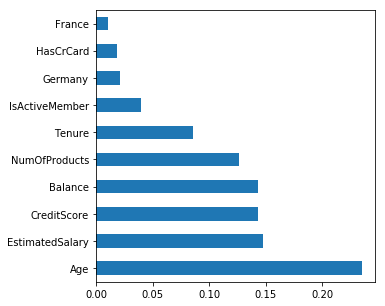

In [69]:
feat_importance.nlargest(10).plot(kind='barh')

# Save Model

In [74]:
import pickle

In [75]:
with open('churn_trained_model.pkl', 'wb') as f:
    pickle.dump(classifier, f,protocol=2)

In [76]:
with open('churn_trained_model.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

In [77]:
clf_loaded

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)